### Causal Graph Estimation and Majority Voting - Oxygen Therapy

This notebook will focus on estimation of causal graphs including the majority voting for the oxygen therapy project. We will look into multiple approaches which might yield different causal relationships between the variables. We will use majority voting if we see a difference in causal relations.
Important: We will exclude $height$ and $weight$ as these are not included in the pilot RCT and BMI is included

Data: Non-oxygenation variables and mean values for the oxygenation variables


In [ ]:
# Load libraries 
library(energy)
library(devtools)
library(pcalg)
library(kpcalg)
library(CAM)
library(bnlearn)
# library(rcausal)

Warning message:
"package 'energy' was built under R version 3.5.3"Warning message:
"package 'devtools' was built under R version 3.5.3"Warning message:
"package 'usethis' was built under R version 3.5.2"Warning message:
"package 'pcalg' was built under R version 3.5.3"Warning message:
"package 'kpcalg' was built under R version 3.5.2"Warning message:
"package 'CAM' was built under R version 3.5.3"Loading required package: glmnet
Warning message:
"package 'glmnet' was built under R version 3.5.3"Loading required package: Matrix
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.5.3"Loaded glmnet 2.0-18

Loading required package: mboost
Warning message:
"package 'mboost' was built under R version 3.5.3"Loading required package: parallel
Loading required package: stabs
Warning message:
"package 'stabs' was built under R version 3.5.3"This is mboost 2.9-1. See 'package?mboost' and 'news(package  = "mboost")'
for a complete list of changes.

L

In [ ]:
# Import data from CSV file
data = read.csv("ot_data_raw.csv",header = TRUE, stringsAsFactors = FALSE)

In [ ]:
# Take a look at the data
data

age,gender,weight,height,bmi,surgery,trauma,medical,apsiii,sofa,...,sao2,pao2,paco2,ph,lactate,hemoglobin,peep,vt,peakAirPressure,minVentVol
62,F,59.4,1.50,26.45,0,0,0,39,5,...,91.20000,84.25926,NA,7.337170,0.7400000,8.271429,9.894737,318.7857,35.35294,10.852000
52,F,80.0,1.47,36.86,0,0,0,77,9,...,94.00000,82.50000,NA,7.414286,1.7250000,7.400000,8.571429,460.1538,20.69231,11.484211
56,M,100.0,1.80,30.75,0,0,0,75,9,...,91.20000,89.26316,36.63158,7.433500,NA,9.975000,10.785714,680.1429,25.50000,16.390000
51,M,64.0,NA,NA,0,0,0,44,4,...,98.00000,122.08333,56.72727,7.188333,1.4000000,10.200000,8.200000,585.5143,29.72414,18.450000
60,M,79.4,1.83,23.74,0,0,0,32,4,...,93.33333,67.25000,69.09091,7.335417,NA,11.266666,6.250000,680.8333,29.28182,13.141667
43,M,80.7,NA,NA,0,0,0,80,11,...,95.50000,88.00000,31.22222,7.351111,10.8500000,9.071429,10.200000,521.2500,25.50000,19.300000
83,F,65.0,1.63,24.60,0,0,0,44,6,...,75.66667,68.25000,35.36364,7.375833,1.3000000,9.200000,7.461538,497.6111,24.26316,13.000000
67,F,44.1,1.63,16.69,0,0,0,78,7,...,79.00000,97.83333,37.66667,7.393333,1.5500000,8.700000,8.500000,377.0000,24.25000,10.851667
57,F,64.9,1.68,23.09,0,0,0,27,2,...,93.71429,88.95455,NA,7.379487,3.4388889,8.745455,12.098592,511.1304,24.71014,9.647778
78,M,75.0,1.70,25.90,0,0,0,24,1,...,95.50000,77.66667,48.66667,7.354000,1.5666667,10.512500,5.000000,407.0000,29.50000,7.450000


In [ ]:
# Get rid of height and weight
data <- subset(data, select = -c(weight,height))
p = dim(data)[2]  # Number of nodes in the graph
data

age,gender,bmi,surgery,trauma,medical,apsiii,sofa,smoker,copd,...,sao2,pao2,paco2,ph,lactate,hemoglobin,peep,vt,peakAirPressure,minVentVol
62,F,26.45,0,0,0,39,5,0,0,...,91.20000,84.25926,NA,7.337170,0.7400000,8.271429,9.894737,318.7857,35.35294,10.852000
52,F,36.86,0,0,0,77,9,0,0,...,94.00000,82.50000,NA,7.414286,1.7250000,7.400000,8.571429,460.1538,20.69231,11.484211
56,M,30.75,0,0,0,75,9,0,0,...,91.20000,89.26316,36.63158,7.433500,NA,9.975000,10.785714,680.1429,25.50000,16.390000
51,M,NA,0,0,0,44,4,1,0,...,98.00000,122.08333,56.72727,7.188333,1.4000000,10.200000,8.200000,585.5143,29.72414,18.450000
60,M,23.74,0,0,0,32,4,0,1,...,93.33333,67.25000,69.09091,7.335417,NA,11.266666,6.250000,680.8333,29.28182,13.141667
43,M,NA,0,0,0,80,11,0,0,...,95.50000,88.00000,31.22222,7.351111,10.8500000,9.071429,10.200000,521.2500,25.50000,19.300000
83,F,24.60,0,0,0,44,6,0,0,...,75.66667,68.25000,35.36364,7.375833,1.3000000,9.200000,7.461538,497.6111,24.26316,13.000000
67,F,16.69,0,0,0,78,7,0,0,...,79.00000,97.83333,37.66667,7.393333,1.5500000,8.700000,8.500000,377.0000,24.25000,10.851667
57,F,23.09,0,0,0,27,2,0,0,...,93.71429,88.95455,NA,7.379487,3.4388889,8.745455,12.098592,511.1304,24.71014,9.647778
78,M,25.90,0,0,0,24,1,0,0,...,95.50000,77.66667,48.66667,7.354000,1.5666667,10.512500,5.000000,407.0000,29.50000,7.450000


In [ ]:
# Change all columns to numeric for correlation
data$gender[data$gender == "M"] <- 1
data$gender[data$gender == "F"] <- 0
data[is.na(data)] <- 0
# Which columns are numeric?
data$gender <- as.numeric(data$gender)
sapply(data, is.numeric)

age          gender             bmi         surgery          trauma 
           TRUE            TRUE            TRUE            TRUE            TRUE 
        medical          apsiii            sofa          smoker            copd 
           TRUE            TRUE            TRUE            TRUE            TRUE 
     ischemicHd            ards           death     oxygenation            spo2 
           TRUE            TRUE            TRUE            TRUE            TRUE 
           fio2            sao2            pao2           paco2              ph 
           TRUE            TRUE            TRUE            TRUE            TRUE 
        lactate      hemoglobin            peep              vt peakAirPressure 
           TRUE            TRUE            TRUE            TRUE            TRUE 
     minVentVol 
           TRUE

In [ ]:
data

age,gender,bmi,surgery,trauma,medical,apsiii,sofa,smoker,copd,...,sao2,pao2,paco2,ph,lactate,hemoglobin,peep,vt,peakAirPressure,minVentVol
62,0,26.45,0,0,0,39,5,0,0,...,91.20000,84.25926,0.00000,7.337170,0.7400000,8.271429,9.894737,318.7857,35.35294,10.852000
52,0,36.86,0,0,0,77,9,0,0,...,94.00000,82.50000,0.00000,7.414286,1.7250000,7.400000,8.571429,460.1538,20.69231,11.484211
56,1,30.75,0,0,0,75,9,0,0,...,91.20000,89.26316,36.63158,7.433500,0.0000000,9.975000,10.785714,680.1429,25.50000,16.390000
51,1,0.00,0,0,0,44,4,1,0,...,98.00000,122.08333,56.72727,7.188333,1.4000000,10.200000,8.200000,585.5143,29.72414,18.450000
60,1,23.74,0,0,0,32,4,0,1,...,93.33333,67.25000,69.09091,7.335417,0.0000000,11.266666,6.250000,680.8333,29.28182,13.141667
43,1,0.00,0,0,0,80,11,0,0,...,95.50000,88.00000,31.22222,7.351111,10.8500000,9.071429,10.200000,521.2500,25.50000,19.300000
83,0,24.60,0,0,0,44,6,0,0,...,75.66667,68.25000,35.36364,7.375833,1.3000000,9.200000,7.461538,497.6111,24.26316,13.000000
67,0,16.69,0,0,0,78,7,0,0,...,79.00000,97.83333,37.66667,7.393333,1.5500000,8.700000,8.500000,377.0000,24.25000,10.851667
57,0,23.09,0,0,0,27,2,0,0,...,93.71429,88.95455,0.00000,7.379487,3.4388889,8.745455,12.098592,511.1304,24.71014,9.647778
78,1,25.90,0,0,0,24,1,0,0,...,95.50000,77.66667,48.66667,7.354000,1.5666667,10.512500,5.000000,407.0000,29.50000,7.450000


In [ ]:
#write.csv("ot_data_preprocessed.csv", x=data, row.names = FALSE, quote=FALSE)

colnames(data) = c(1:ncol(data)) # If colume names are too long, then the node in the plot become empty.


Attaching package: 'BiocGenerics'

The following objects are masked from 'package:bnlearn':

    path, score

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:Matrix':

    colMeans, colSums, rowMeans, rowSums, which

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique

0,1,0,0,1,0,0,0,0,1,...,1,1,0,1,0,0,1,0,1,0
0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
0,0,1,0,0,0,0,1,0,0,...,0,1,1,0,1,1,0,0,0,0
0,0,0,1,1,0,0,0,0,1,...,1,1,0,1,1,0,1,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


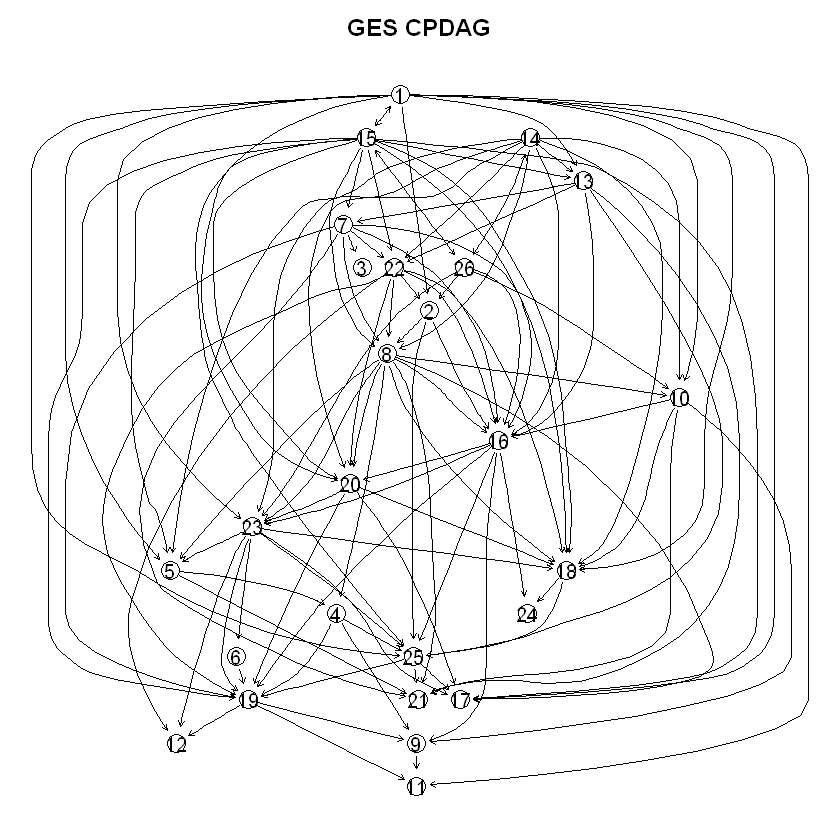

In [ ]:
# GES Algorithm - 1
score <- new("GaussL0penObsScore", data)
ges1.fit <- ges(score, fixedGaps = NULL, adaptive = "vstructures", phase = "forward", maxDegree = integer(0), verbose = FALSE)
plot(ges1.fit$essgraph, main = "GES CPDAG",attrs=list(node=list(fontsize=20)))

matGES1 <- matrix(0, nrow = p, ncol = p)
row = 1
for(list in ges1.fit$essgraph$.in.edges){
    for (node in list){
        matGES1[node, row] <- 1
    }
    row = row + 1
}
matGES1
write.csv("ot_graph_GES1.csv", x=matGES1, row.names = FALSE, quote=FALSE)

0,1,0,0,1,0,0,0,0,1,...,1,1,0,1,0,0,1,0,1,0
0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
0,0,1,0,0,0,0,1,0,0,...,0,1,1,0,1,0,0,0,0,0
0,0,0,1,1,0,0,0,0,1,...,1,1,0,1,1,0,1,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


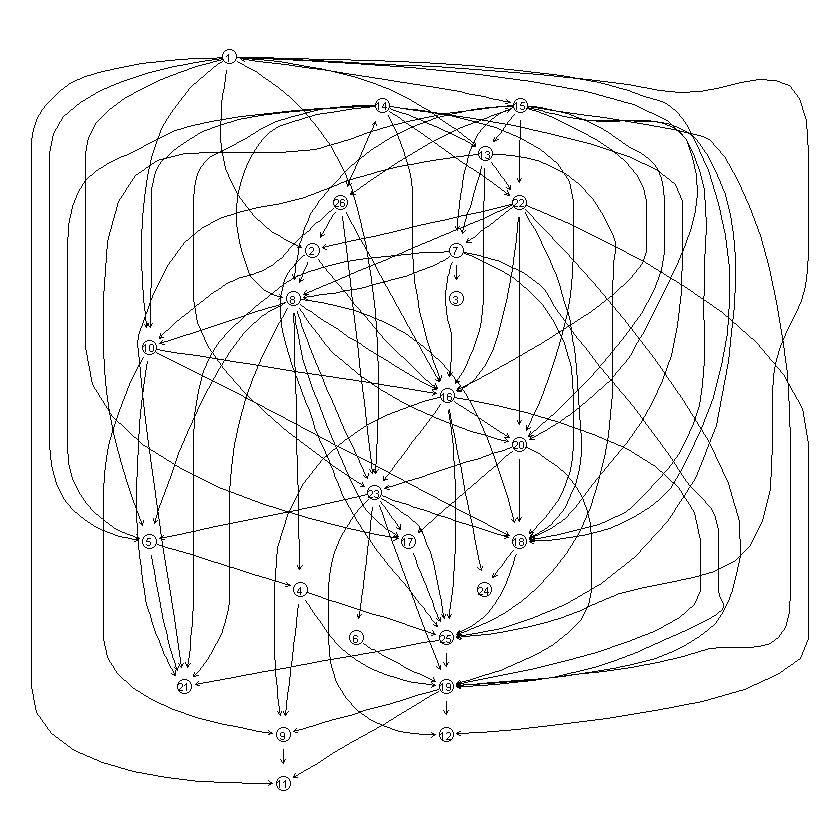

In [ ]:
# GES Algorithm - 2
# dev.off() # clear the last plot
## Compute score
#colnames(data) = c(1:ncol(data)) # If colume names are too long, then the node in the plot become empty. 
score.ges2 = new("GaussL0penObsScore", data)
## Fitting 
result.ges2 = ges(score.ges2)
## Plot 
plot(result.ges2$essgraph)

matGES2 <- matrix(0, nrow = p, ncol = p)
row = 1
for(list in result.ges2$essgraph$.in.edges){
    for (node in list){
        matGES2[node, row] <- 1
    }
    row = row + 1
}
matGES2
write.csv("ot_graph_GES2.csv", x=matGES2, row.names = FALSE, quote=FALSE)

0,1,0,0,1,0,0,0,0,1,...,1,1,0,1,0,0,1,0,1,0
0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
0,0,1,0,0,0,0,1,0,0,...,0,1,1,0,1,1,0,0,0,0
0,0,0,1,1,0,0,0,0,1,...,1,1,0,1,1,0,1,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


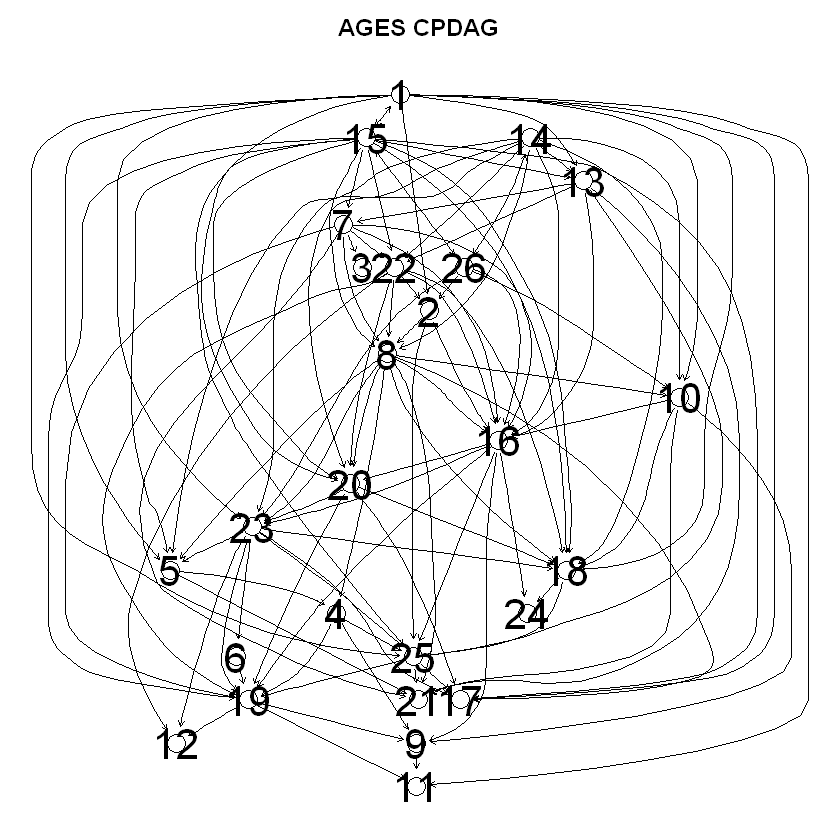

In [ ]:
# AGES
ages.fit <- ages(data, lambda_min = 0.5 * log(nrow(data)), labels = NULL,
     fixedGaps = NULL, adaptive = "triples",
     maxDegree = integer(0), verbose = FALSE)
plot(ages.fit$essgraph, main = "AGES CPDAG",attrs=list(node=list(fontsize=40)))

matAGES <- matrix(0, nrow = p, ncol = p)
row = 1
for(list in ages.fit$essgraph$.in.edges){
    for (node in list){
        matAGES[node, row] <- 1
    }
    row = row + 1
}
matAGES
write.csv("ot_graph_AGES.csv", x=matAGES, row.names = FALSE, quote=FALSE)

0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,...,0,1,1,0,1,1,0,0,0,0
0,0,0,1,0,0,1,0,0,0,...,1,1,0,1,1,1,1,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


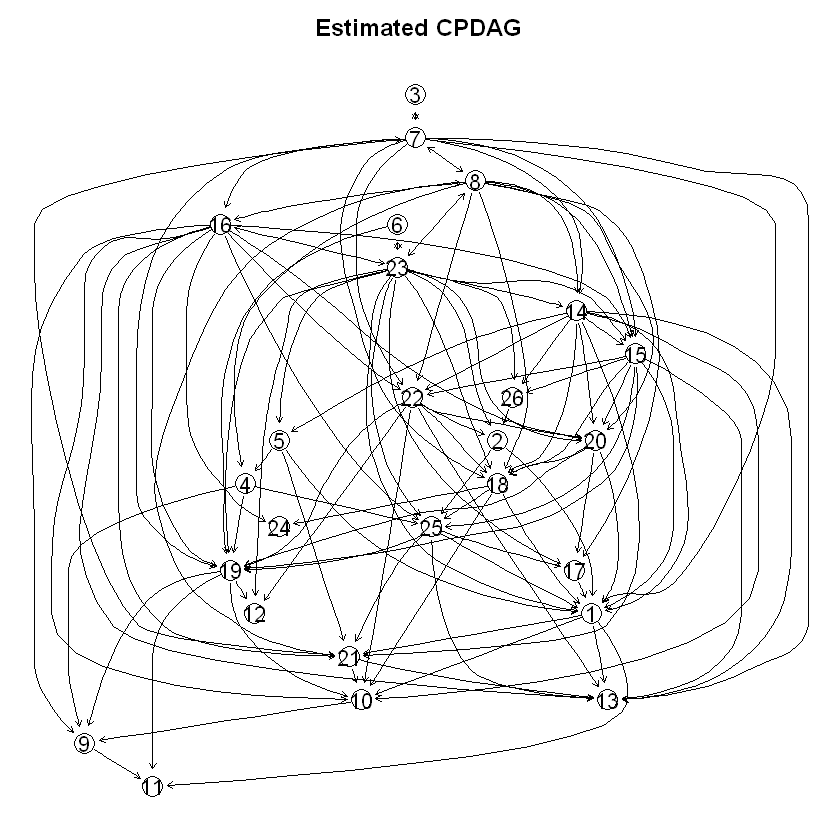

In [ ]:
# GDS
gds.fit <- gds(score, fixedGaps = NULL, adaptive = "triples", phase = "forward", maxDegree = integer(0), verbose = FALSE)
plot(gds.fit$essgraph, main = "Estimated CPDAG",attrs=list(node=list(fontsize=20)))

matGDS <- matrix(0, nrow = p, ncol = p)
row = 1
for(list in gds.fit$essgraph$.in.edges){
    for (node in list){
        matGDS[node, row] <- 1
    }
    row = row + 1
}
matGDS
write.csv("ot_graph_GDS.csv", x=matGDS, row.names = FALSE, quote=FALSE)

0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


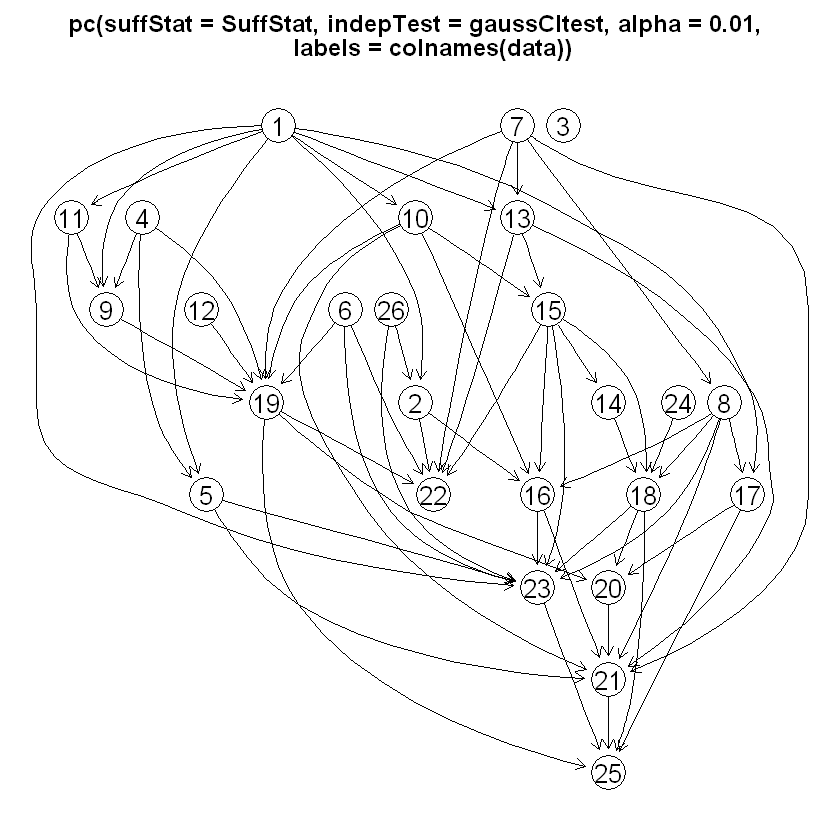

In [ ]:
# PC Algorithm 
## Parameters 
SuffStat = list(C=cor(data),n=nrow(data))
## Fitting 
#result.pc = pc(suffStat = SuffStat, indepTest = gaussCItest, p=ncol(data),alpha=0.01 )
result.pc = pc(suffStat = SuffStat, indepTest = gaussCItest, labels = colnames(data),alpha=0.01 )
## plot 
plot(result.pc)

matPC <- matrix(0, nrow = p, ncol = p)
row = 1
for(list in result.pc@graph@edgeL){
    for (node in list){
        matPC[node, row] <- 1
    }
    row = row + 1
}
matPC
write.csv("ot_graph_PC.csv", x=matPC, row.names = FALSE, quote=FALSE)

0,1,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


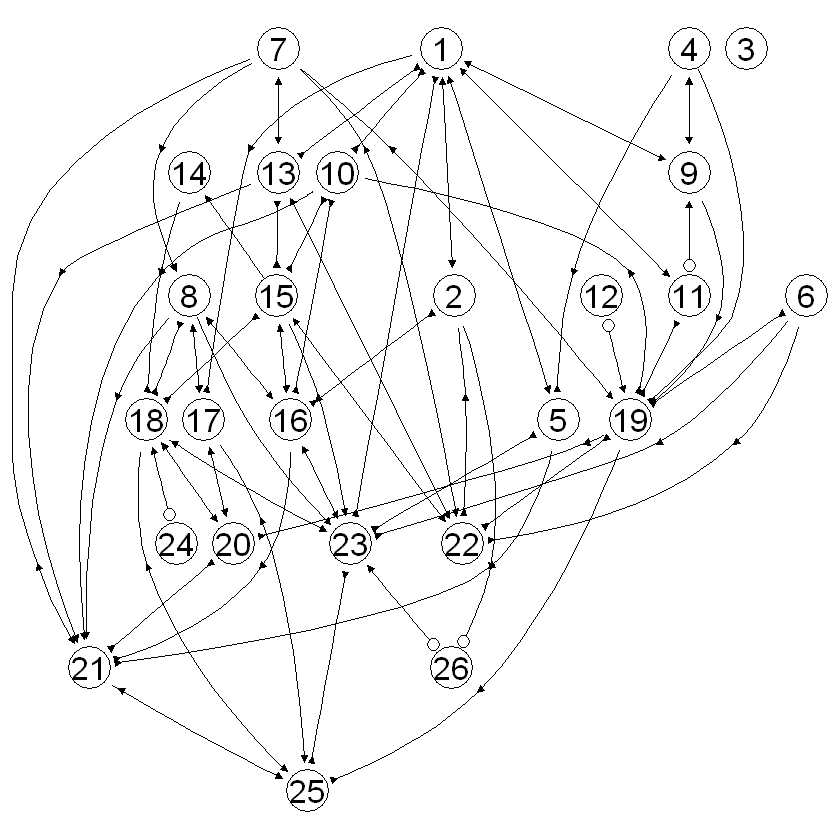

In [ ]:
# RFCI algorithm (RFCI is a fast version of FCI algorithm) 
#dev.off() # clear the last plot
## Compute score 
result.rfci = rfci(SuffStat,indepTest = gaussCItest, p = ncol(data), alpha=0.01 )
## plot 
plot(result.rfci)

matRFCI <- matrix(0, nrow = p, ncol = p)
item = 0
for(l in result.rfci@amat){
    row = item%%p + 1
    column = as.integer(item/p) + 1    
#    cat(sprintf("Num: %i --> Row: %i Column: %i\n", item, row, column))
    if(l == 2)
        matRFCI[row, column] = 1
    if(l == 3)
        matRFCI[column, row] = 1
    item = item + 1
}
matRFCI
write.csv("ot_graph_RFCI.csv", x=matRFCI, row.names = FALSE, quote=FALSE)

In [ ]:
# Change data type for the following algorithms
data<-lapply(data, as.numeric)

0,1,0,0,0,0,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
0,1,0,0,0,0,0,0,0,1,...,1,1,0,1,1,1,0,0,1,0
1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


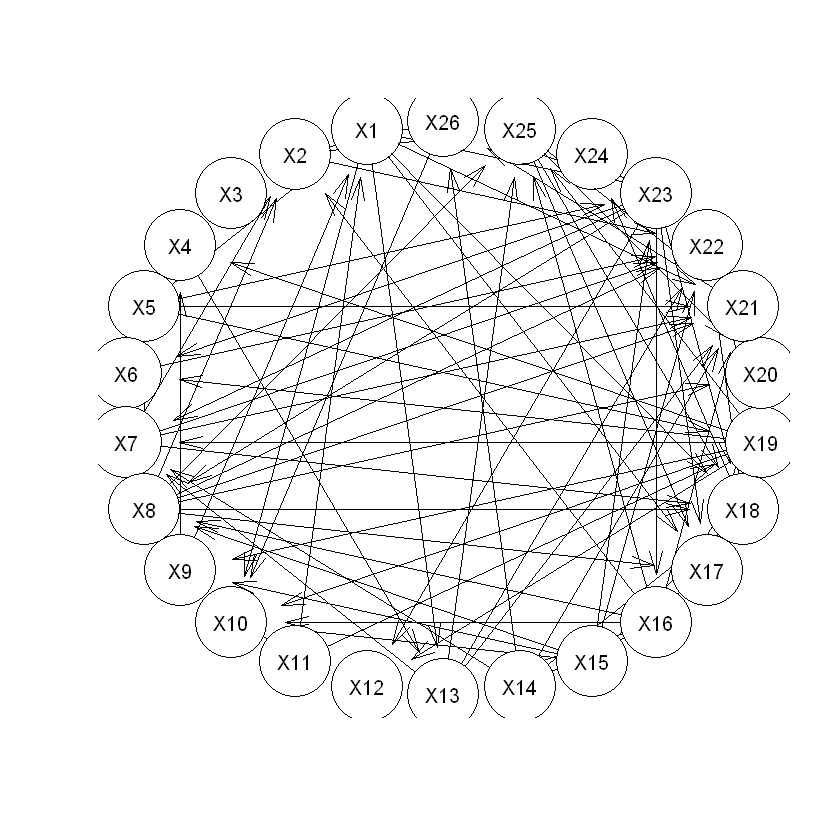

In [ ]:
# TABU Search
tabuStrct <- tabu(as.data.frame(data))
bn.mod <- bn.fit(tabuStrct, data = as.data.frame(data))
plot(tabuStrct, ylim = c(0,600), xlim = c(0,600), radius = 300,
      arrow = 50, highlight = NULL, color = "red")

matTABU <- matrix(0, nrow = p, ncol = p)

numberOfEdges = length(tabuStrct$arcs) / 2
for(l in 1:numberOfEdges){
    # print(tabuStrct$arcs[l, c("from", "to")]) ## Print an endge
    row = as.numeric(gsub("X", "", tabuStrct$arcs[l, c("from")]))
    column = as.numeric(gsub("X", "", tabuStrct$arcs[l, c("to")]))
    #print(row)
    #print(column)
    matTABU[row, column] <- 1
}

matTABU
write.csv("ot_graph_TABU.csv", x=matTABU, row.names = FALSE, quote=FALSE)

0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


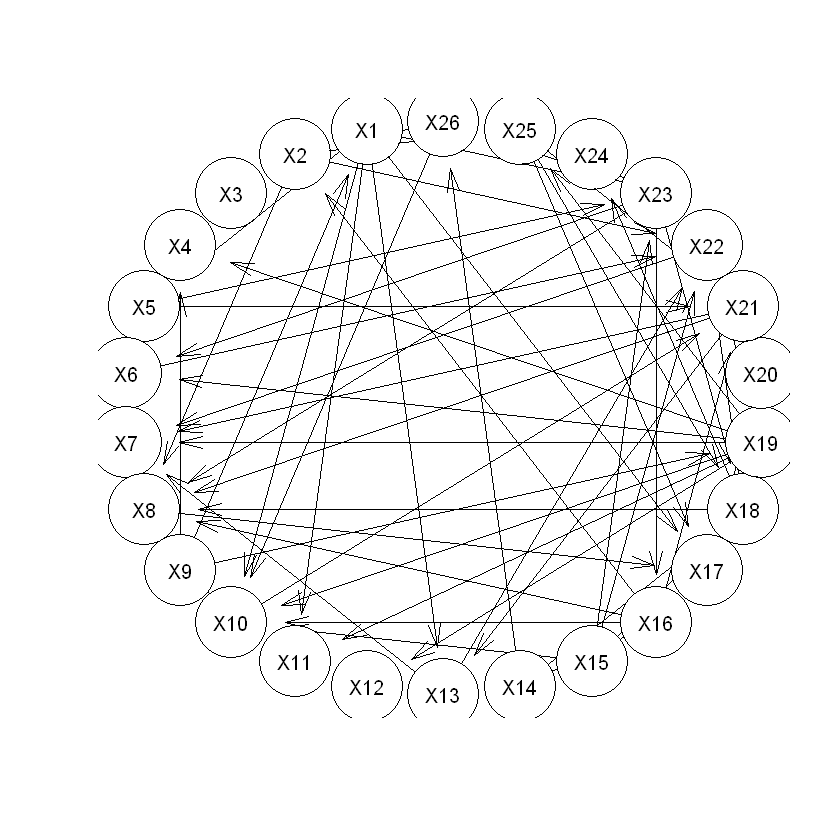

In [ ]:
# Max-Min Hill Climbing
maxStrct <- mmhc(as.data.frame(data))
bn.mod <- bn.fit(maxStrct, data = as.data.frame(data))
plot(maxStrct, ylim = c(0,600), xlim = c(0,600), radius = 300,
      arrow = 50, highlight = NULL, color = "red")

matMMHC <- matrix(0, nrow = p, ncol = p)

numberOfEdges = length(maxStrct$arcs) / 2
for(l in 1:numberOfEdges){
    # print(tabuStrct$arcs[l, c("from", "to")]) ## Print an endge
    row = as.numeric(gsub("X", "", maxStrct$arcs[l, c("from")]))
    column = as.numeric(gsub("X", "", maxStrct$arcs[l, c("to")]))
    #print(row)
    #print(column)
    matMMHC[row, column] <- 1
}

matMMHC
write.csv("ot_graph_MMHC.csv", x=matMMHC, row.names = FALSE, quote=FALSE)

In [ ]:
write.csv("ot_data_preprocessed.csv", x=data, row.names = FALSE, quote=FALSE)


In [ ]:
dfLINGAM = read.csv("causal_fusion_ot_graph_LINGAM_adj_matrix.csv", skip = 1, header = FALSE)
matLINGAM = as.matrix(dfLINGAM)
matLINGAM

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Majority Voting
Now, let's add all the votes (matrices) to do the majority voting



In [ ]:
matMajVoting = matGES1 + matGDS + matPC + matRFCI + matTABU + matMMHC + matLINGAM
matMajVoting

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
0,4,0,0,3,0,0,0,1,6,...,5,2,0,1,2,0,4,0,2,0
3,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,3,0,0,4,2
0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,2,0,0,0,3,0,...,0,0,3,0,0,0,0,0,2,0
4,1,0,6,0,0,0,1,0,0,...,0,0,1,0,5,0,3,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,3,2,0,0,0
1,1,2,0,0,0,0,6,0,0,...,0,3,3,0,5,4,0,0,0,0
0,2,0,2,2,0,3,0,0,2,...,5,4,0,3,4,2,3,0,1,0
4,0,0,5,0,0,0,0,0,2,...,0,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,2,0,...,0,1,1,0,3,0,0,0,0,0


In [ ]:
write.csv("ot_maj_voting_graph_adj_matrix.csv", x=matMajVoting, row.names = FALSE, quote=FALSE)
